In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('/Users/lmao/PycharmProjects/MoodTrackerBot/logs.csv')
data.timestamp = pd.to_datetime(data.timestamp)
data['date'] = data['timestamp'].dt.strftime('%Y-%m-%d')
data['date_hour'] = data['timestamp'].dt.strftime('%Y-%m-%d %H')
data['hour'] = data['timestamp'].dt.strftime('%H')
data['day_of_week_'] = data['timestamp'].dt.day_name()
data['day_of_week_num'] = data['timestamp'].dt.weekday
data

,id,user_id,event_type,timestamp,details,date,date_hour,hour,day_of_week_,day_of_week_num
0,1,331482026,response_activity,2024-11-24 22:27:34.119782,NaN,2024-11-24,2024-11-24 22,22,Sunday,6
1,2,331482026,answer_activity,2024-11-24 22:27:35.177979,Работаю / Учусь,2024-11-24,2024-11-24 22,22,Sunday,6
2,3,331482026,answer_emotional,2024-11-24 22:27:36.371552,Очень хорошее,2024-11-24,2024-11-24 22,22,Sunday,6
3,4,331482026,response_physical,2024-11-24 22:27:36.556688,NaN,2024-11-24,2024-11-24 22,22,Sunday,6
4,5,331482026,answer_physical,2024-11-24 22:27:37.606509,Нормальное,2024-11-24,2024-11-24 22,22,Sunday,6
...,...,...,...,...,...,...,...,...,...,...
745,746,331482026,response_activity,2024-12-15 13:31:18.641715,NaN,2024-12-15,2024-12-15 13,13,Sunday,6
746,747,331482026,answer_activity,2024-12-15 14:21:40.022550,Отдыхаю / Смотрю видео,2024-12-15,2024-12-15 14,14,Sunday,6
747,748,331482026,answer_emotional,2024-12-15 14:21:42.796980,Очень хорошее,2024-12-15,2024-12-15 14,14,Sunday,6
748,749,331482026,response_physical,2024-12-15 14:21:43.008969,NaN,2024-12-15,2024-12-15 14,14,Sunday,6


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               750 non-null    int64         
 1   user_id          750 non-null    int64         
 2   event_type       750 non-null    object        
 3   timestamp        750 non-null    datetime64[ns]
 4   details          450 non-null    object        
 5   date             750 non-null    object        
 6   date_hour        750 non-null    object        
 7   hour             750 non-null    object        
 8   day_of_week_     750 non-null    object        
 9   day_of_week_num  750 non-null    int32         
dtypes: datetime64[ns](1), int32(1), int64(2), object(6)
memory usage: 55.8+ KB


In [4]:
mood_map = {
    "Прекрасное": 10,
    "Очень хорошее": 9,
    "Хорошее": 8,
    "Удовлетворительное": 7,
    "Нормальное": 6,
    "Среднее": 5,
    "Плохое": 4,
    "Очень плохое": 3,
    "Ужасное": 2,
    "Критически плохое": 1,
}

physical_state_map = {
    "Отличное": 5,
    "Хорошее": 4,
    "Нормальное": 3,
    "Плохое": 2,
    "Очень плохое": 1,
}

In [5]:
df_activity = data.copy()
df_activity = df_activity[df_activity.event_type == 'answer_activity']
df_activity

,id,user_id,event_type,timestamp,details,date,date_hour,hour,day_of_week_,day_of_week_num
1,2,331482026,answer_activity,2024-11-24 22:27:35.177979,Работаю / Учусь,2024-11-24,2024-11-24 22,22,Sunday,6
6,7,331482026,answer_activity,2024-11-25 06:57:33.943414,Работаю / Учусь,2024-11-25,2024-11-25 06,06,Monday,0
11,12,331482026,answer_activity,2024-11-25 07:58:22.193384,Отдыхаю / Смотрю видео,2024-11-25,2024-11-25 07,07,Monday,0
16,17,331482026,answer_activity,2024-11-25 09:23:46.006748,Работаю / Учусь,2024-11-25,2024-11-25 09,09,Monday,0
21,22,331482026,answer_activity,2024-11-25 10:24:00.626547,Работаю / Учусь,2024-11-25,2024-11-25 10,10,Monday,0
...,...,...,...,...,...,...,...,...,...,...
728,729,331482026,answer_activity,2024-12-14 18:10:31.976285,Работаю / Учусь,2024-12-14,2024-12-14 18,18,Saturday,5
733,734,331482026,answer_activity,2024-12-14 19:15:07.225179,Работаю / Учусь,2024-12-14,2024-12-14 19,19,Saturday,5
734,735,331482026,answer_activity,2024-12-14 19:15:12.216960,Работаю / Учусь,2024-12-14,2024-12-14 19,19,Saturday,5
739,740,331482026,answer_activity,2024-12-14 20:47:31.943946,Работаю / Учусь,2024-12-14,2024-12-14 20,20,Saturday,5


In [6]:
df_emotions = data.copy()
df_emotions = df_emotions[df_emotions.event_type == 'answer_emotional']
df_emotions['mood_level'] = df_emotions.details.apply(lambda x: mood_map[x])
df_emotions

,id,user_id,event_type,timestamp,details,date,date_hour,hour,day_of_week_,day_of_week_num,mood_level
2,3,331482026,answer_emotional,2024-11-24 22:27:36.371552,Очень хорошее,2024-11-24,2024-11-24 22,22,Sunday,6,9
7,8,331482026,answer_emotional,2024-11-25 06:57:38.880827,Удовлетворительное,2024-11-25,2024-11-25 06,06,Monday,0,7
12,13,331482026,answer_emotional,2024-11-25 07:58:24.603210,Хорошее,2024-11-25,2024-11-25 07,07,Monday,0,8
17,18,331482026,answer_emotional,2024-11-25 09:23:48.536272,Очень хорошее,2024-11-25,2024-11-25 09,09,Monday,0,9
22,23,331482026,answer_emotional,2024-11-25 10:24:09.324046,Прекрасное,2024-11-25,2024-11-25 10,10,Monday,0,10
...,...,...,...,...,...,...,...,...,...,...,...
729,730,331482026,answer_emotional,2024-12-14 18:10:33.216893,Очень хорошее,2024-12-14,2024-12-14 18,18,Saturday,5,9
735,736,331482026,answer_emotional,2024-12-14 19:15:16.200379,Очень хорошее,2024-12-14,2024-12-14 19,19,Saturday,5,9
740,741,331482026,answer_emotional,2024-12-14 20:47:33.296487,Очень хорошее,2024-12-14,2024-12-14 20,20,Saturday,5,9
742,743,331482026,answer_emotional,2024-12-14 20:47:35.254876,Очень хорошее,2024-12-14,2024-12-14 20,20,Saturday,5,9


In [7]:
df_physical_state = data.copy()
df_physical_state = df_physical_state[df_physical_state.event_type == 'answer_physical']
df_physical_state['physical_state_level'] = df_physical_state.details.apply(lambda x: physical_state_map[x])
df_physical_state

,id,user_id,event_type,timestamp,details,date,date_hour,hour,day_of_week_,day_of_week_num,physical_state_level
4,5,331482026,answer_physical,2024-11-24 22:27:37.606509,Нормальное,2024-11-24,2024-11-24 22,22,Sunday,6,3
9,10,331482026,answer_physical,2024-11-25 06:57:44.798782,Нормальное,2024-11-25,2024-11-25 06,06,Monday,0,3
14,15,331482026,answer_physical,2024-11-25 07:58:30.073092,Нормальное,2024-11-25,2024-11-25 07,07,Monday,0,3
19,20,331482026,answer_physical,2024-11-25 09:23:50.334499,Хорошее,2024-11-25,2024-11-25 09,09,Monday,0,4
24,25,331482026,answer_physical,2024-11-25 10:24:17.332494,Хорошее,2024-11-25,2024-11-25 10,10,Monday,0,4
...,...,...,...,...,...,...,...,...,...,...,...
726,727,331482026,answer_physical,2024-12-14 17:10:24.192875,Хорошее,2024-12-14,2024-12-14 17,17,Saturday,5,4
731,732,331482026,answer_physical,2024-12-14 18:10:34.235287,Хорошее,2024-12-14,2024-12-14 18,18,Saturday,5,4
737,738,331482026,answer_physical,2024-12-14 19:15:17.593210,Хорошее,2024-12-14,2024-12-14 19,19,Saturday,5,4
744,745,331482026,answer_physical,2024-12-15 12:31:18.640343,Хорошее,2024-12-15,2024-12-15 12,12,Sunday,6,4


## Анализ скорости ответов

In [10]:
# Загрузка файла с логами
file_path = "/Users/lmao/PycharmProjects/MoodTrackerBot/logs.csv"

# Чтение данных из файла
logs = pd.read_csv(file_path)

# Задача 1: Расчёт времени между запросами и ответами

# Преобразование временной метки в datetime
logs['timestamp'] = pd.to_datetime(logs['timestamp'])

# Создание нового DataFrame для работы с запросами и ответами
response_request_mapping = {
    "response_activity": "answer_activity",
    "response_physical": "answer_physical",
    "response_emotional": "answer_emotional",
}

# Фильтрация данных, содержащих только запросы и ответы
filtered_logs = logs[logs['event_type'].isin(response_request_mapping.keys()) | 
                     logs['event_type'].isin(response_request_mapping.values())]

# Сортировка данных по user_id и timestamp для корректной работы
filtered_logs = filtered_logs.sort_values(by=["user_id", "timestamp"])

# Добавление времени запроса в DataFrame с временем ответа
response_with_timestamps = []

for request, answer in response_request_mapping.items():
    user_groups = filtered_logs.groupby("user_id")
    for user_id, group in user_groups:
        request_rows = group[group["event_type"] == request]
        answer_rows = group[group["event_type"] == answer]
        for _, request_row in request_rows.iterrows():
            # Поиск соответствующего ответа
            answer_row = answer_rows[answer_rows["timestamp"] >= request_row["timestamp"]].head(1)
            if not answer_row.empty:
                delta = answer_row["timestamp"].values[0] - request_row["timestamp"]
                response_with_timestamps.append({
                    "user_id": user_id,
                    "request_type": request,
                    "request_timestamp": request_row["timestamp"],
                    "response_time_seconds": delta.total_seconds()
                })

# Создание DataFrame с временем ответа и временными метками запросов
response_times_with_timestamps_df = pd.DataFrame(response_with_timestamps)
response_times_with_timestamps_df["request_hour"] = response_times_with_timestamps_df["request_timestamp"].dt.hour
response_times_with_timestamps_df

,user_id,request_type,request_timestamp,response_time_seconds,request_hour
0,331482026,response_activity,2024-11-24 22:27:34.119782,1.058197,22
1,331482026,response_activity,2024-11-24 23:27:37.607887,26996.335527,23
2,331482026,response_activity,2024-11-25 07:57:44.802057,37.391327,7
3,331482026,response_activity,2024-11-25 08:58:30.074979,1515.931769,8
4,331482026,response_activity,2024-11-25 10:23:50.335843,10.290704,10
...,...,...,...,...,...
294,331482026,response_physical,2024-12-14 20:47:35.445506,56623.194837,20
295,331482026,response_physical,2024-12-15 14:21:43.008969,0.936811,14
296,653522735,response_physical,2024-12-13 08:23:49.161286,9.851319,8
297,653522735,response_physical,2024-12-13 09:53:20.294419,4.555329,9


In [11]:
df_longresp = response_times_with_timestamps_df[response_times_with_timestamps_df.response_time_seconds >= 3600].reset_index(drop=True)

# Функция для определения группы времени
def time_group(hour):
    if 9 <= hour < 17:
        return "09–17"
    elif 7 <= hour < 9:
        return "07–09"
    elif 17 <= hour < 20:
        return "17–20"
    elif 20 <= hour < 22:
        return "20–22"
    elif 22 <= hour < 24:
        return "22–00"
    else:
        return "00–07"

# Добавление новой колонки с группами времени
df_longresp["time_group"] = df_longresp["request_hour"].apply(time_group)
df_longresp

,user_id,request_type,request_timestamp,response_time_seconds,request_hour,time_group
0,331482026,response_activity,2024-11-24 23:27:37.607887,26996.335527,23,22–00
1,331482026,response_activity,2024-11-25 17:32:25.612369,6159.552642,17,17–20
2,331482026,response_activity,2024-11-26 01:05:57.412369,32424.800499,1,00–07
3,331482026,response_activity,2024-11-26 16:56:13.011726,4685.625669,16,09–17
4,331482026,response_activity,2024-11-26 22:09:48.550770,30586.632878,22,22–00
5,331482026,response_activity,2024-11-27 21:00:43.449960,68364.903331,21,20–22
6,331482026,response_activity,2024-11-28 18:00:34.640765,6909.465581,18,17–20
7,331482026,response_activity,2024-11-28 21:56:03.350753,36015.710470,21,20–22
8,331482026,response_activity,2024-11-29 23:23:33.760744,41455.588537,23,22–00
9,331482026,response_activity,2024-11-30 15:06:22.440484,8776.592974,15,09–17


Text(0.5, 1.0, 'Распределение длительных ответов')

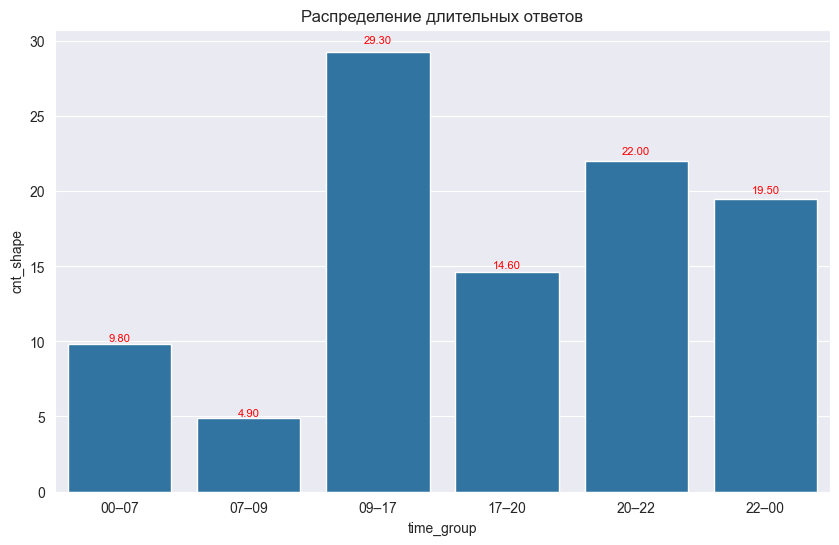

In [40]:
df_longresp_agg = df_longresp.groupby("time_group").request_timestamp.nunique().reset_index(name='cnt')

time_group_order = [
    "00–07",
    "07–09",
    "09–17",
    "17–20",
    "20–22",
    "22–00"
]

# Преобразование колонки time_group в категориальный тип с заданным порядком
df_longresp_agg["time_group"] = pd.Categorical(
    df_longresp_agg["time_group"], 
    categories=time_group_order, 
    ordered=True
)

df_longresp_agg['cnt_shape'] = (df_longresp_agg['cnt'] / df_longresp_agg['cnt'].sum() *100).round(1)

fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x="time_group", y="cnt_shape", data=df_longresp_agg, ax=ax)
for x, y in zip(df_longresp_agg.time_group, df_longresp_agg.cnt_shape):
    ax.text(x, y * 1.02, f'{y:.2f}', fontsize=8, color='red', ha='center')
plt.title('Распределение длительных ответов')

Text(0.5, 1.0, 'Среднее и медианное время ожидания в длительных ответах')

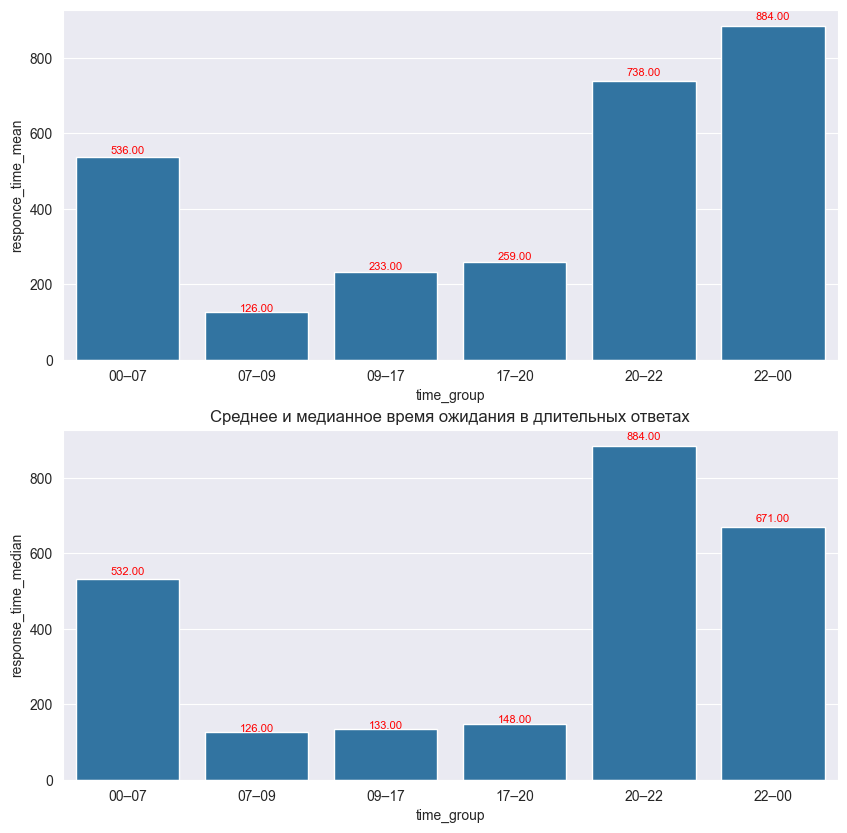

In [56]:
df_longresp_agg = df_longresp.groupby("time_group").agg(responce_time_mean=('response_time_seconds', 'mean'), response_time_median=('response_time_seconds', 'median')).reset_index()
df_longresp_agg.responce_time_mean = df_longresp_agg['responce_time_mean'] // 60
df_longresp_agg.response_time_median = df_longresp_agg['response_time_median'] // 60

time_group_order = [
    "00–07",
    "07–09",
    "09–17",
    "17–20",
    "20–22",
    "22–00"
]

# Преобразование колонки time_group в категориальный тип с заданным порядком
df_longresp_agg["time_group"] = pd.Categorical(
    df_longresp_agg["time_group"], 
    categories=time_group_order, 
    ordered=True
)

fig, ax = plt.subplots(2, figsize=(10, 10))
ax1 = ax[0]
ax2 = ax[1]
sns.barplot(x="time_group", y="responce_time_mean", data=df_longresp_agg, ax=ax1)
for x, y in zip(df_longresp_agg.time_group, df_longresp_agg.responce_time_mean):
    ax1.text(x, y * 1.02, f'{y:.2f}', fontsize=8, color='red', ha='center')
    
sns.barplot(x="time_group", y="response_time_median", data=df_longresp_agg, ax=ax2)
for x, y in zip(df_longresp_agg.time_group, df_longresp_agg.response_time_median):
    ax2.text(x, y * 1.02, f'{y:.2f}', fontsize=8, color='red', ha='center')
    
plt.title('Среднее и медианное время ожидания в длительных ответах')

### Анализ скорости не пропущенных ответов

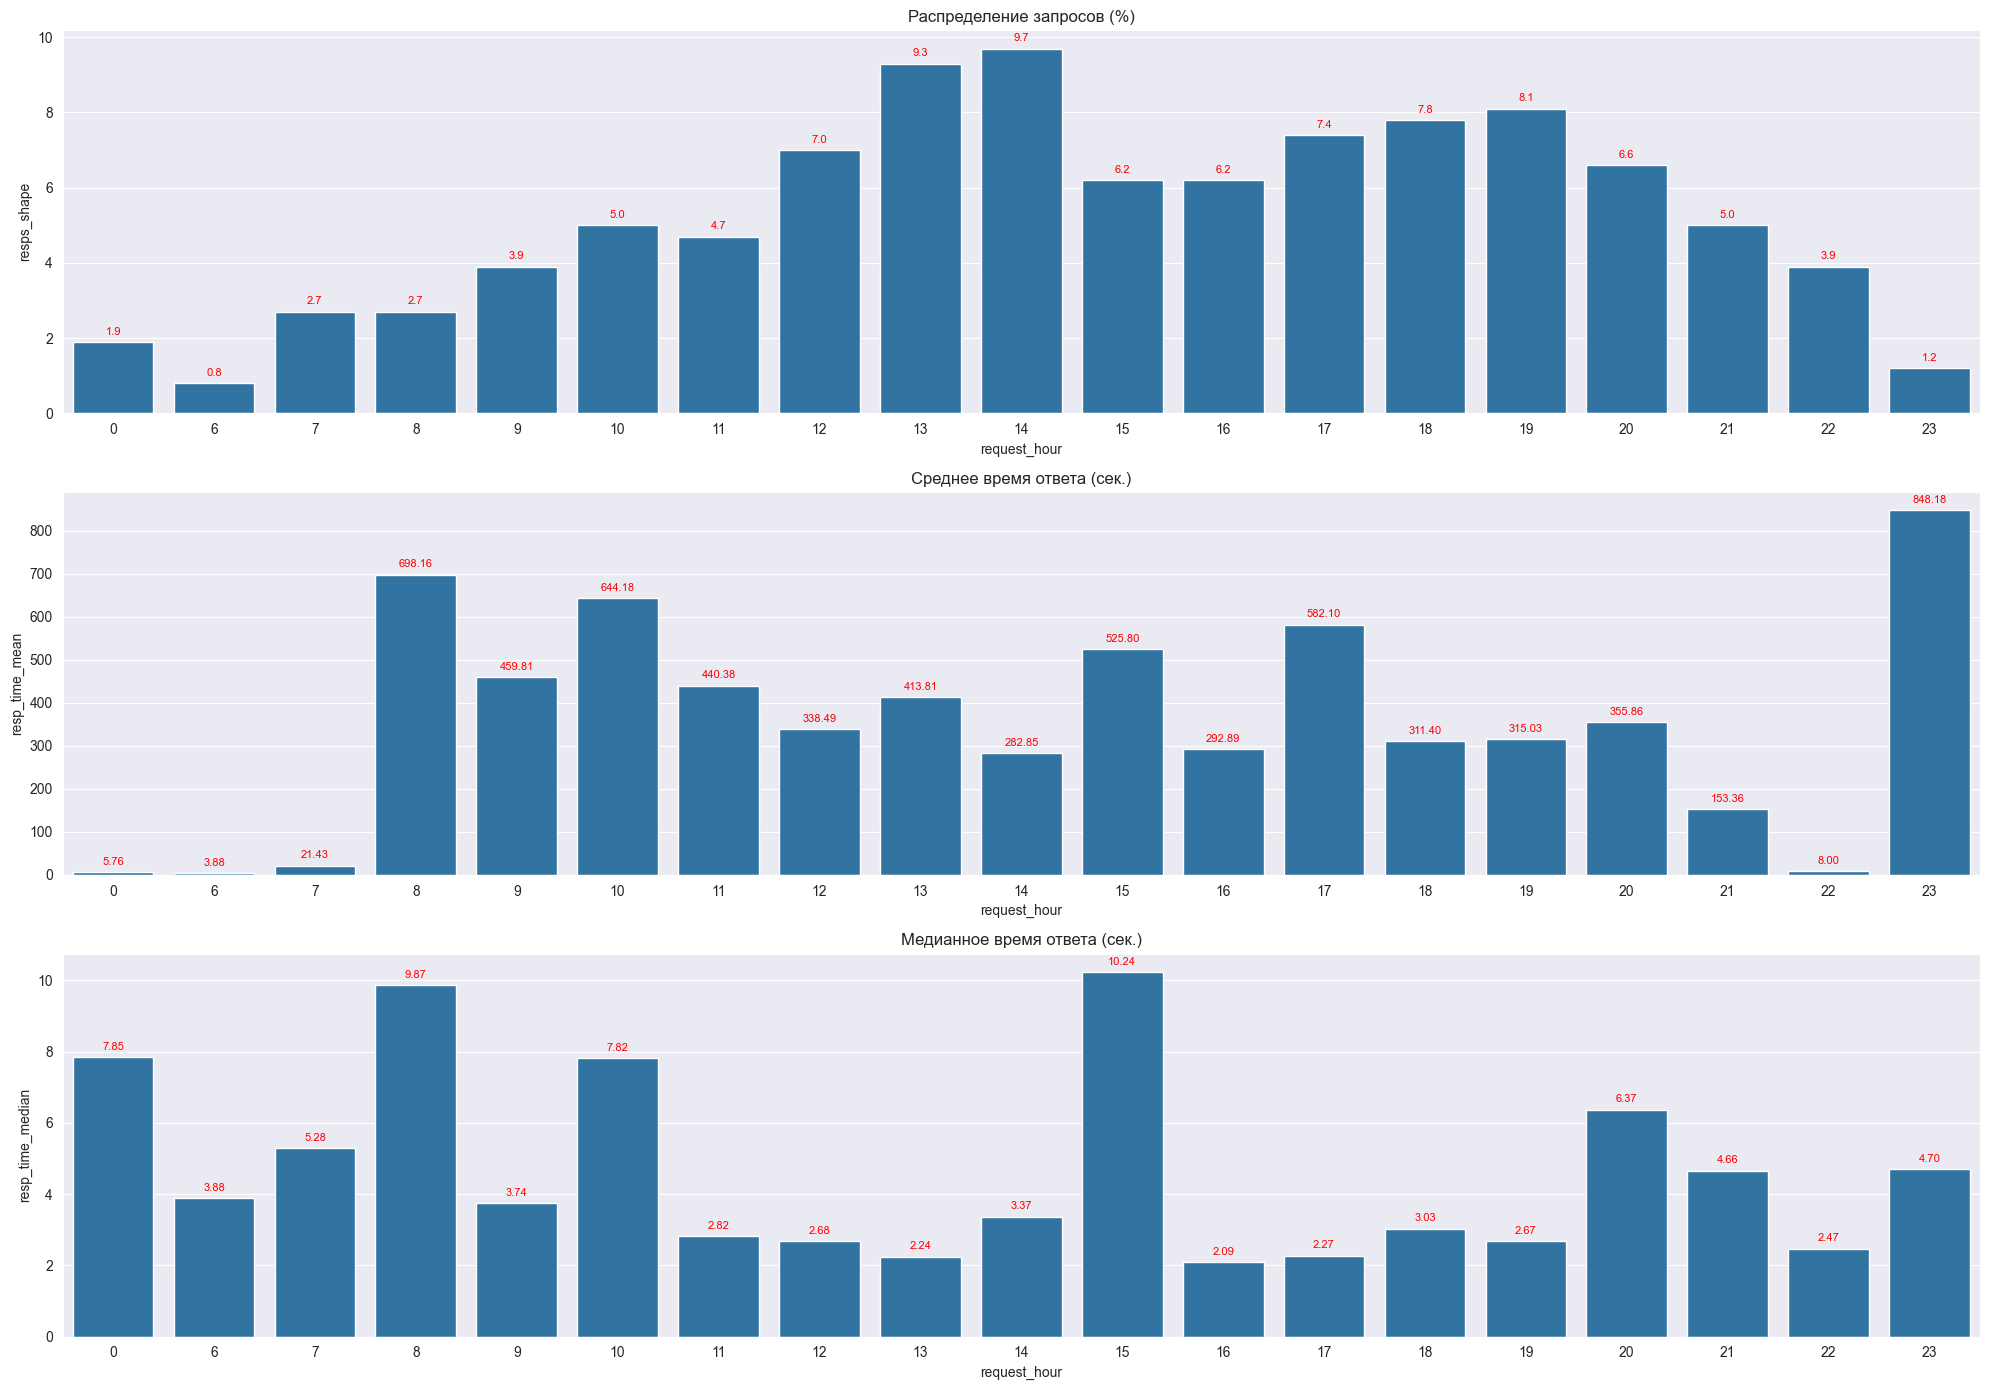

In [66]:
df_nolongresp = response_times_with_timestamps_df[response_times_with_timestamps_df.response_time_seconds < 3600].reset_index(drop=True)
df_nolongresp_agg = df_nolongresp.groupby('request_hour').agg(resps=('request_timestamp', 'nunique'), resp_time_mean=('response_time_seconds', 'mean'), resp_time_median=('response_time_seconds', 'median')).reset_index()

df_nolongresp_agg['resps_shape'] = (df_nolongresp_agg['resps'] / df_nolongresp_agg['resps'].sum()*100).round(1)

fig, ax = plt.subplots(3, figsize=(20, 14))

ax1, ax2, ax3 = ax

# График 1: Распределение запросов
sns.barplot(x="request_hour", y="resps_shape", data=df_nolongresp_agg, ax=ax1)
for x, y in enumerate(df_nolongresp_agg['resps_shape']):
    ax1.text(x, y + max(df_nolongresp_agg['resps_shape']) * 0.02, f'{y:.1f}', fontsize=8, color='red', ha='center')

ax1.set_title("Распределение запросов (%)")

# График 2: Среднее время ответа
sns.barplot(x="request_hour", y="resp_time_mean", data=df_nolongresp_agg, ax=ax2)
for x, y in enumerate(df_nolongresp_agg['resp_time_mean']):
    ax2.text(x, y + max(df_nolongresp_agg['resp_time_mean']) * 0.02, f'{y:.2f}', fontsize=8, color='red', ha='center')

ax2.set_title("Среднее время ответа (сек.)")

# График 3: Медианное время ответа
sns.barplot(x="request_hour", y="resp_time_median", data=df_nolongresp_agg, ax=ax3)
for x, y in enumerate(df_nolongresp_agg['resp_time_median']):
    ax3.text(x, y + max(df_nolongresp_agg['resp_time_median']) * 0.02, f'{y:.2f}', fontsize=8, color='red', ha='center')

ax3.set_title("Медианное время ответа (сек.)")

plt.tight_layout()
plt.show()

## Анализ активности

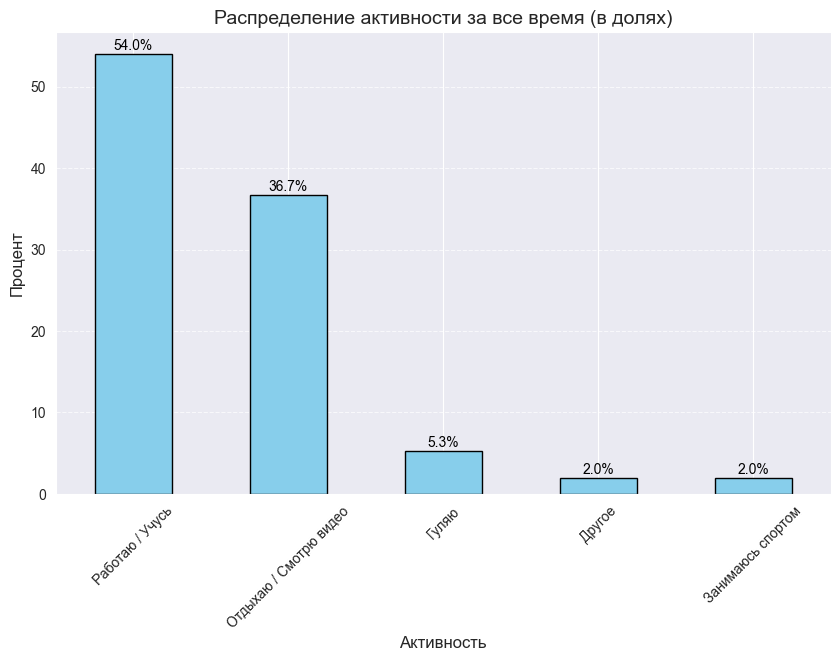

In [76]:
# Фильтрация данных только для активности
df_activity = logs[logs['event_type'] == 'answer_activity']

# Добавление колонки с часом и днем недели
df_activity['hour'] = df_activity['timestamp'].dt.hour
df_activity['weekday'] = df_activity['timestamp'].dt.weekday  # 0 - понедельник, 6 - воскресенье

# Определение буднего дня или выходного
df_activity['day_type'] = df_activity['weekday'].apply(lambda x: 'Будний день' if x < 5 else 'Выходной')

# 1. Распределение активности за все время
activity_distribution = df_activity['details'].value_counts()

# Расчет долей для распределения активности
activity_distribution_percentage = activity_distribution / activity_distribution.sum() * 100

# Визуализация распределения активности в долях
plt.figure(figsize=(10, 6))
ax = activity_distribution_percentage.plot(kind='bar', color='skyblue', edgecolor='black')

# Добавление значений над барами
for i, value in enumerate(activity_distribution_percentage):
    ax.text(i, value + 0.5, f'{value:.1f}%', ha='center', fontsize=10, color='black')

plt.title('Распределение активности за все время (в долях)', fontsize=14)
plt.xlabel('Активность', fontsize=12)
plt.ylabel('Процент', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

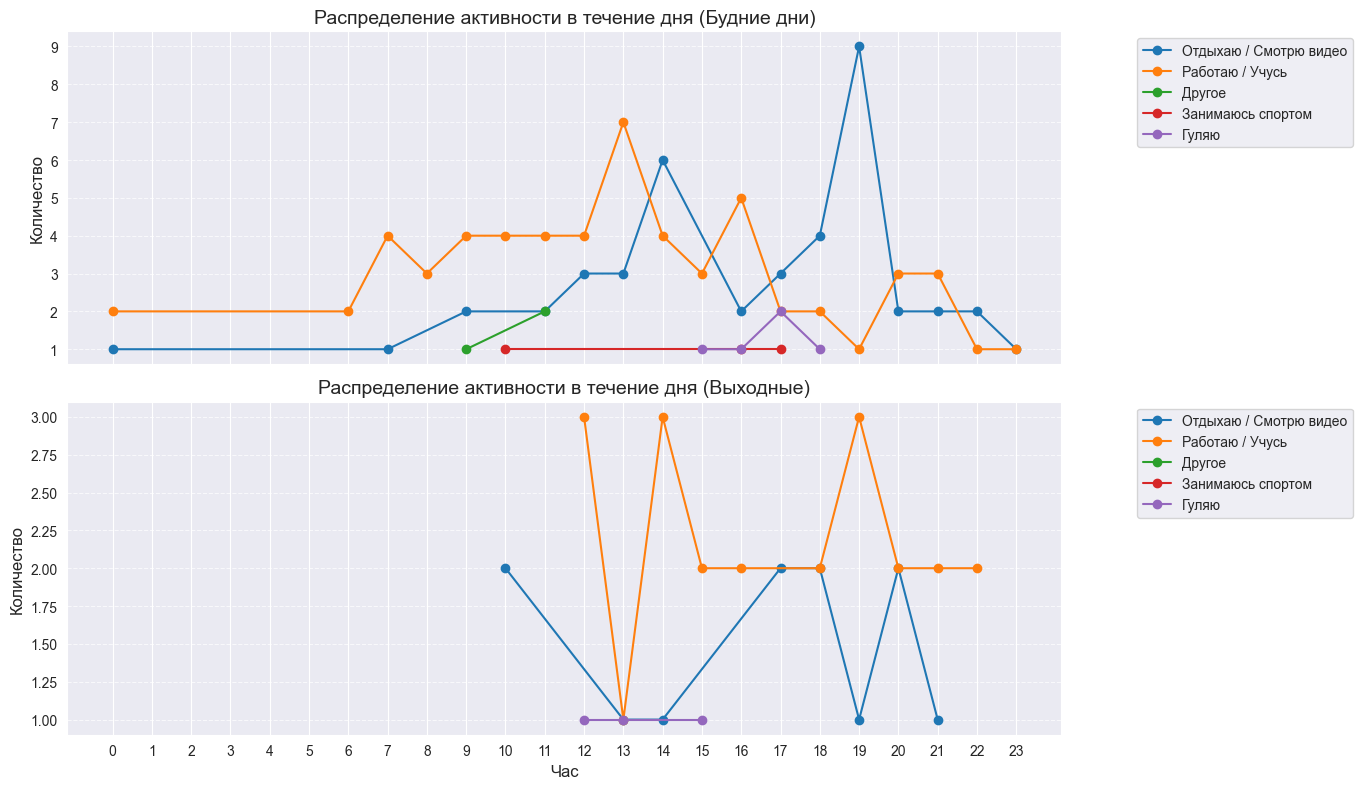

In [85]:
hourly_distribution = df_activity.groupby(['day_type', 'hour', 'details']).size().reset_index(name='count')

# Уникальные активности и соответствующие цвета
unique_activities = hourly_distribution['details'].unique()
activity_colors = dict(zip(unique_activities, sns.color_palette("tab10", len(unique_activities))))

# Повторная визуализация с использованием единой цветовой схемы
fig, axes = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# График для будних дней
weekday_data = hourly_distribution[hourly_distribution['day_type'] == 'Будний день']
for activity in unique_activities:
    subset = weekday_data[weekday_data['details'] == activity]
    axes[0].plot(subset['hour'], subset['count'], marker='o', label=activity, color=activity_colors[activity])
axes[0].set_title('Распределение активности в течение дня (Будние дни)', fontsize=14)
axes[0].set_ylabel('Количество', fontsize=12)
axes[0].legend(loc='upper right', bbox_to_anchor=(1.3, 1))
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].set_xticks(range(0, 24))
axes[0].set_xticklabels(range(0, 24))

# График для выходных
weekend_data = hourly_distribution[hourly_distribution['day_type'] == 'Выходной']
for activity in unique_activities:
    subset = weekend_data[weekend_data['details'] == activity]
    axes[1].plot(subset['hour'], subset['count'], marker='o', label=activity, color=activity_colors[activity])
axes[1].set_title('Распределение активности в течение дня (Выходные)', fontsize=14)
axes[1].set_xlabel('Час', fontsize=12)
axes[1].set_ylabel('Количество', fontsize=12)
axes[1].legend(loc='upper right', bbox_to_anchor=(1.3, 1))
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Установка общих параметров для осей
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

## Анализ эмоционального и физического состояния

In [12]:
mood_map = {
    "Прекрасное": 10,
    "Очень хорошее": 9,
    "Хорошее": 8,
    "Удовлетворительное": 7,
    "Нормальное": 6,
    "Среднее": 5,
    "Плохое": 4,
    "Очень плохое": 3,
    "Ужасное": 2,
    "Критически плохое": 1,
}

physical_state_map = {
    "Отличное": 5,
    "Хорошее": 4,
    "Нормальное": 3,
    "Плохое": 2,
    "Очень плохое": 1,
}

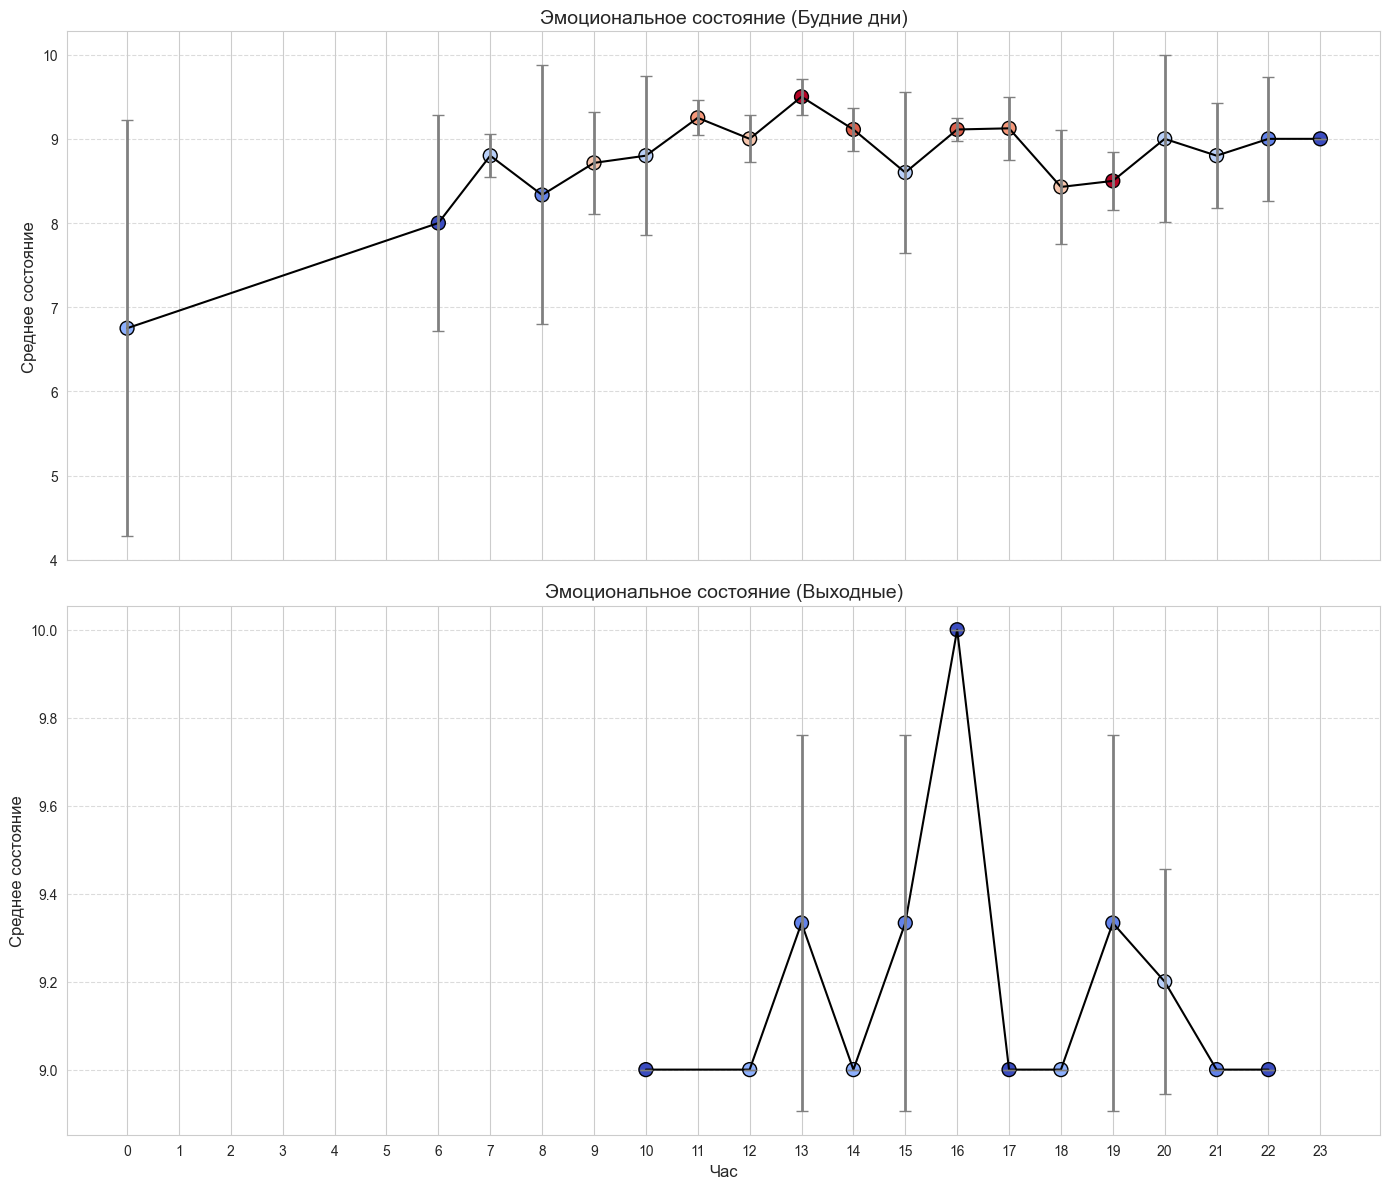

In [32]:
import matplotlib.colors as mcolors

logs = pd.read_csv(file_path)

# Преобразование временной метки в datetime
logs['timestamp'] = pd.to_datetime(logs['timestamp'])

# Фильтрация данных для эмоционального состояния
mood_map = {
    "Прекрасное": 10,
    "Очень хорошее": 9,
    "Хорошее": 8,
    "Удовлетворительное": 7,
    "Нормальное": 6,
    "Среднее": 5,
    "Плохое": 4,
    "Очень плохое": 3,
    "Ужасное": 2,
    "Критически плохое": 1,
}

df_emotion = logs[logs['event_type'] == 'answer_emotional'].copy()
df_emotion['mood_score'] = df_emotion['details'].map(mood_map)
df_emotion['hour'] = df_emotion['timestamp'].dt.hour
df_emotion['day_type'] = df_emotion['timestamp'].dt.weekday.apply(lambda x: 'Будний день' if x < 5 else 'Выходной')

# Группировка данных для анализа
emotion_stats = df_emotion.groupby(['day_type', 'hour'])['mood_score'].agg(['mean', 'std']).reset_index()

def safe_confidence_interval(mean, std, count, confidence=0.8):
    if count > 1:
        margin = 1.28 * (std / (count ** 0.5))  # z-score для 80% доверительного интервала
        return mean - margin, mean + margin
    else:
        return mean, mean

# Добавление доверительных интервалов
counts = df_emotion.groupby(['day_type', 'hour'])['mood_score'].size().reset_index(name='count')
emotion_stats = pd.merge(emotion_stats, counts, on=['day_type', 'hour'])
emotion_stats[['ci_lower', 'ci_upper']] = emotion_stats.apply(
    lambda row: pd.Series(safe_confidence_interval(row['mean'], row['std'], row['count'])), axis=1
)

# Нормализация количества ответов для цветовой схемы
norm = mcolors.Normalize(vmin=counts['count'].min(), vmax=counts['count'].max())
colormap = plt.cm.coolwarm

# Визуализация
fig, axes = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

# Будние дни
df_weekday = emotion_stats[emotion_stats['day_type'] == 'Будний день']
colors_weekday = colormap(norm(df_weekday['count']))
axes[0].plot(
    df_weekday['hour'], df_weekday['mean'], color='black', linestyle='-', label='Будние дни'
)
scatter_weekday = axes[0].scatter(
    df_weekday['hour'], df_weekday['mean'],
    color=colors_weekday, s=100, edgecolor='black'  # Увеличен размер точек
)
axes[0].errorbar(
    df_weekday['hour'], df_weekday['mean'],
    yerr=[df_weekday['mean'] - df_weekday['ci_lower'], df_weekday['ci_upper'] - df_weekday['mean']],
    fmt='none', ecolor='gray', elinewidth=2, capsize=4
)
axes[0].set_title('Эмоциональное состояние (Будние дни)', fontsize=14)
axes[0].set_ylabel('Среднее состояние', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].set_xticks(range(0, 24))

# Выходные
df_weekend = emotion_stats[emotion_stats['day_type'] == 'Выходной']
colors_weekend = colormap(norm(df_weekend['count']))
axes[1].plot(
    df_weekend['hour'], df_weekend['mean'], color='black', linestyle='-', label='Выходные'
)
scatter_weekend = axes[1].scatter(
    df_weekend['hour'], df_weekend['mean'],
    color=colors_weekend, s=100, edgecolor='black'  # Увеличен размер точек
)
axes[1].errorbar(
    df_weekend['hour'], df_weekend['mean'],
    yerr=[df_weekend['mean'] - df_weekend['ci_lower'], df_weekend['ci_upper'] - df_weekend['mean']],
    fmt='none', ecolor='gray', elinewidth=2, capsize=4
)
axes[1].set_title('Эмоциональное состояние (Выходные)', fontsize=14)
axes[1].set_xlabel('Час', fontsize=12)
axes[1].set_ylabel('Среднее состояние', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

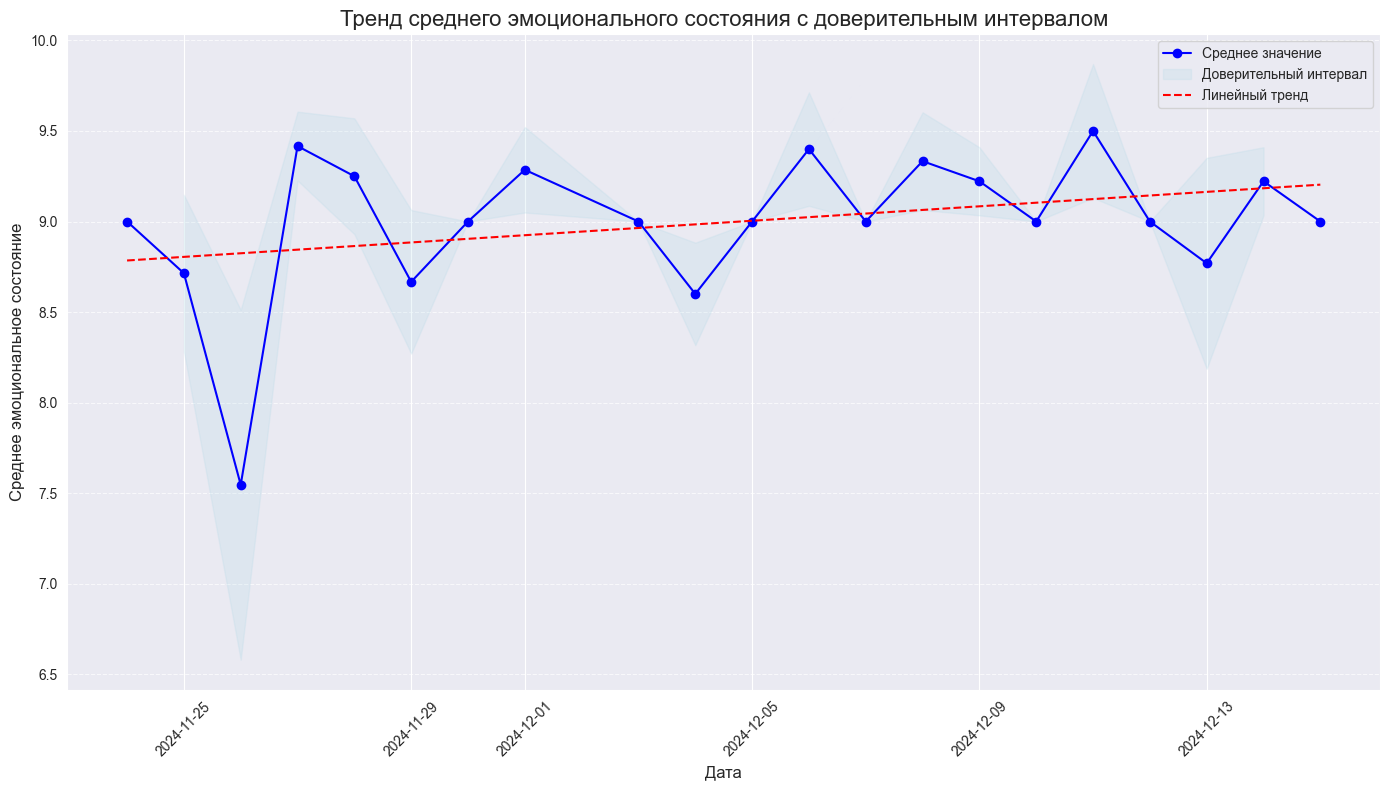

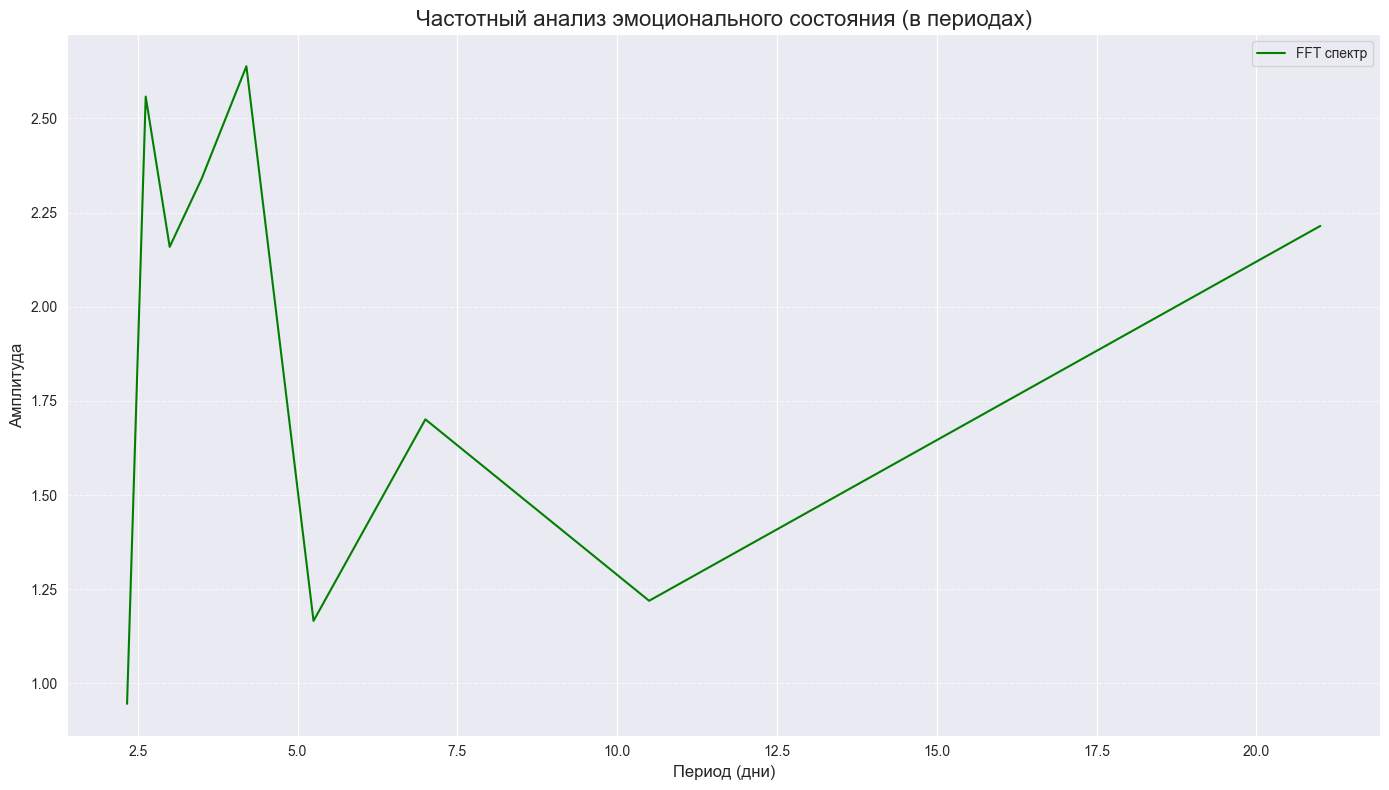

In [21]:
from sklearn.linear_model import LinearRegression
from scipy.stats import sem

logs = pd.read_csv(file_path)

# Преобразование временной метки в datetime
logs['timestamp'] = pd.to_datetime(logs['timestamp'])

# Фильтрация данных для эмоционального состояния
mood_map = {
    "Прекрасное": 10,
    "Очень хорошее": 9,
    "Хорошее": 8,
    "Удовлетворительное": 7,
    "Нормальное": 6,
    "Среднее": 5,
    "Плохое": 4,
    "Очень плохое": 3,
    "Ужасное": 2,
    "Критически плохое": 1,
}

df_emotion = logs[logs['event_type'] == 'answer_emotional'].copy()
df_emotion['mood_score'] = df_emotion['details'].map(mood_map)
df_emotion['date'] = pd.to_datetime(df_emotion['timestamp'].dt.date)  # Приведение к datetime

# Группировка данных по дате с расчетом среднего и стандартной ошибки
emotion_daily = df_emotion.groupby('date')['mood_score'].agg(['mean', sem]).reset_index()
emotion_daily.rename(columns={'mean': 'mood_mean', 'sem': 'mood_sem'}, inplace=True)

# Добавление доверительного интервала (80%)
emotion_daily['ci_lower'] = emotion_daily['mood_mean'] - 1.28 * emotion_daily['mood_sem']
emotion_daily['ci_upper'] = emotion_daily['mood_mean'] + 1.28 * emotion_daily['mood_sem']

# Добавление индекса для регрессии
emotion_daily['date_index'] = (emotion_daily['date'] - emotion_daily['date'].min()).dt.days

# Линейная регрессия
X = emotion_daily['date_index'].values.reshape(-1, 1)
y = emotion_daily['mood_mean']
regressor = LinearRegression()
regressor.fit(X, y)
emotion_daily['linear_trend'] = regressor.predict(X)

# Визуализация тренда с доверительным интервалом и линейным регрессором
plt.figure(figsize=(14, 8))
plt.plot(emotion_daily['date'], emotion_daily['mood_mean'], marker='o', linestyle='-', color='blue', label='Среднее значение')
plt.fill_between(emotion_daily['date'], emotion_daily['ci_lower'], emotion_daily['ci_upper'], alpha=0.2, color='lightblue', label='Доверительный интервал')
plt.plot(emotion_daily['date'], emotion_daily['linear_trend'], color='red', linestyle='--', label='Линейный тренд')
plt.title('Тренд среднего эмоционального состояния с доверительным интервалом', fontsize=16)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Среднее эмоциональное состояние', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Проверка на периодичность (быстрое преобразование Фурье)
fft_result = np.fft.fft(emotion_daily['mood_mean'])
frequencies = np.fft.fftfreq(len(emotion_daily['mood_mean']))

# Преобразование частоты в периоды
periods = 1 / frequencies[1:len(frequencies)//2]
amplitudes = np.abs(fft_result[1:len(frequencies)//2])

# Визуализация спектра с периодами
plt.figure(figsize=(14, 8))
plt.plot(periods, amplitudes, color='green', label='FFT спектр')
plt.title('Частотный анализ эмоционального состояния (в периодах)', fontsize=16)
plt.xlabel('Период (дни)', fontsize=12)
plt.ylabel('Амплитуда', fontsize=12)
# plt.xscale('log')  # Логарифмическая шкала для удобства
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Физическое состояние

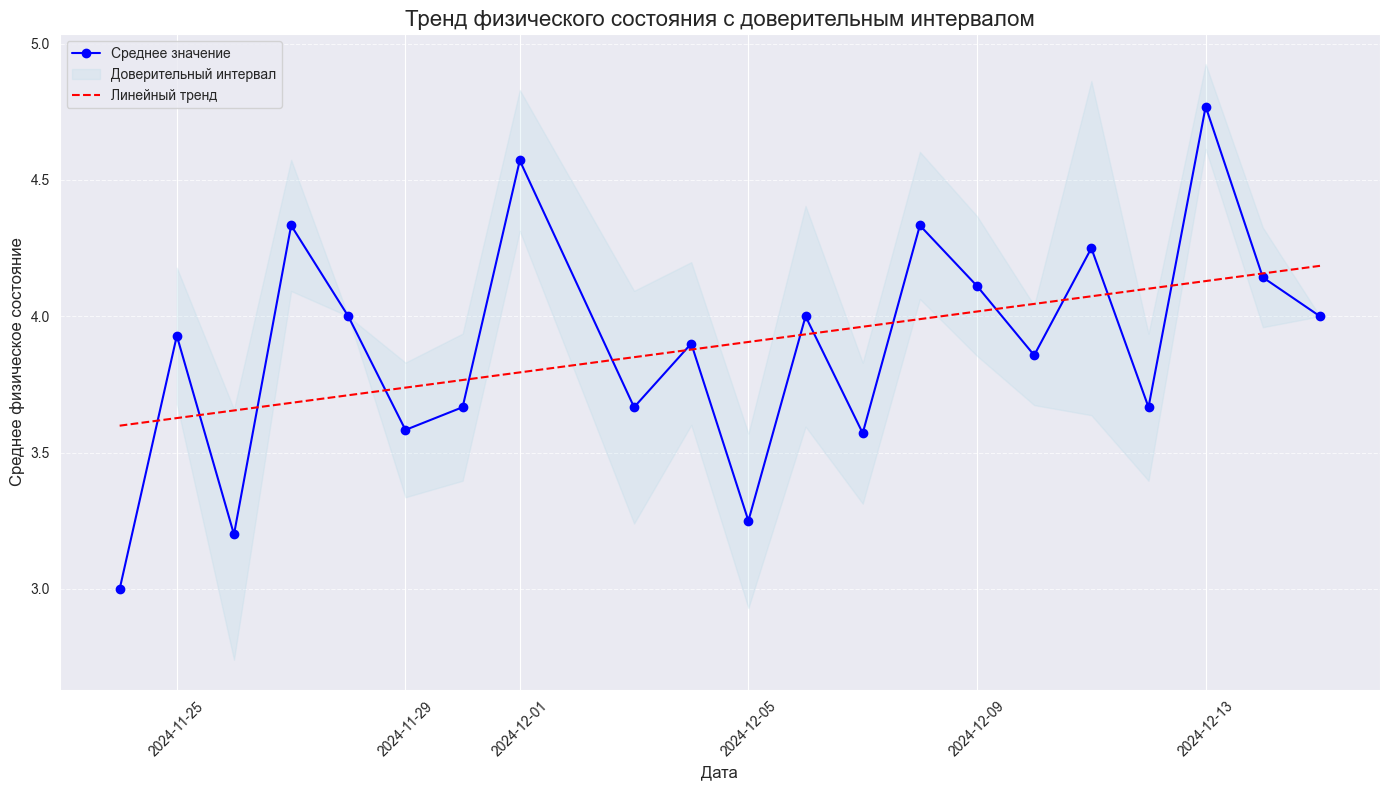

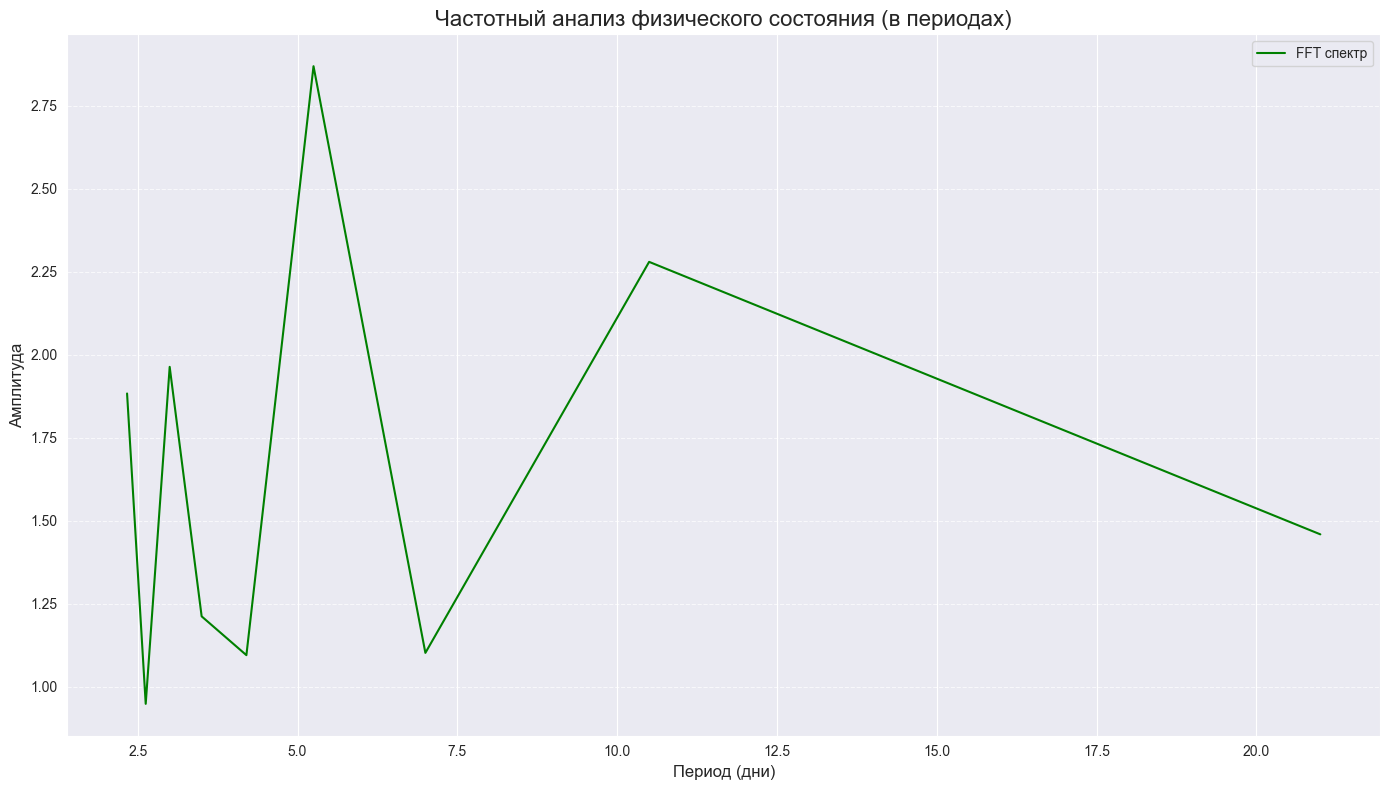

In [23]:
logs = pd.read_csv(file_path)

# Преобразование временной метки в datetime
logs['timestamp'] = pd.to_datetime(logs['timestamp'])

# Фильтрация данных для физического состояния
physical_state_map = {
    "Отличное": 5,
    "Хорошее": 4,
    "Нормальное": 3,
    "Плохое": 2,
    "Очень плохое": 1,
}

df_physical = logs[logs['event_type'] == 'answer_physical'].copy()
df_physical['physical_score'] = df_physical['details'].map(physical_state_map)
df_physical['date'] = pd.to_datetime(df_physical['timestamp'].dt.date)  # Приведение к datetime

# Группировка данных по дате с расчетом среднего и стандартной ошибки
physical_daily = df_physical.groupby('date')['physical_score'].agg(['mean', sem]).reset_index()
physical_daily.rename(columns={'mean': 'physical_mean', 'sem': 'physical_sem'}, inplace=True)

# Добавление доверительного интервала (80%)
physical_daily['ci_lower'] = physical_daily['physical_mean'] - 1.28 * physical_daily['physical_sem']
physical_daily['ci_upper'] = physical_daily['physical_mean'] + 1.28 * physical_daily['physical_sem']

# Добавление индекса для регрессии
physical_daily['date_index'] = (physical_daily['date'] - physical_daily['date'].min()).dt.days

# Линейная регрессия
X = physical_daily['date_index'].values.reshape(-1, 1)
y = physical_daily['physical_mean']
regressor = LinearRegression()
regressor.fit(X, y)
physical_daily['linear_trend'] = regressor.predict(X)

# Визуализация тренда с доверительным интервалом и линейным регрессором
plt.figure(figsize=(14, 8))
plt.plot(physical_daily['date'], physical_daily['physical_mean'], marker='o', linestyle='-', color='blue', label='Среднее значение')
plt.fill_between(physical_daily['date'], physical_daily['ci_lower'], physical_daily['ci_upper'], alpha=0.2, color='lightblue', label='Доверительный интервал')
plt.plot(physical_daily['date'], physical_daily['linear_trend'], color='red', linestyle='--', label='Линейный тренд')
plt.title('Тренд физического состояния с доверительным интервалом', fontsize=16)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Среднее физическое состояние', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Проверка на периодичность (быстрое преобразование Фурье)
fft_result = np.fft.fft(physical_daily['physical_mean'])
frequencies = np.fft.fftfreq(len(physical_daily['physical_mean']))

# Преобразование частоты в периоды
periods = 1 / frequencies[1:len(frequencies)//2]
amplitudes = np.abs(fft_result[1:len(frequencies)//2])

# Визуализация спектра с периодами
plt.figure(figsize=(14, 8))
plt.plot(periods, amplitudes, color='green', label='FFT спектр')
plt.title('Частотный анализ физического состояния (в периодах)', fontsize=16)
plt.xlabel('Период (дни)', fontsize=12)
plt.ylabel('Амплитуда', fontsize=12)
# plt.xscale('log')  # Логарифмическая шкала для удобства
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

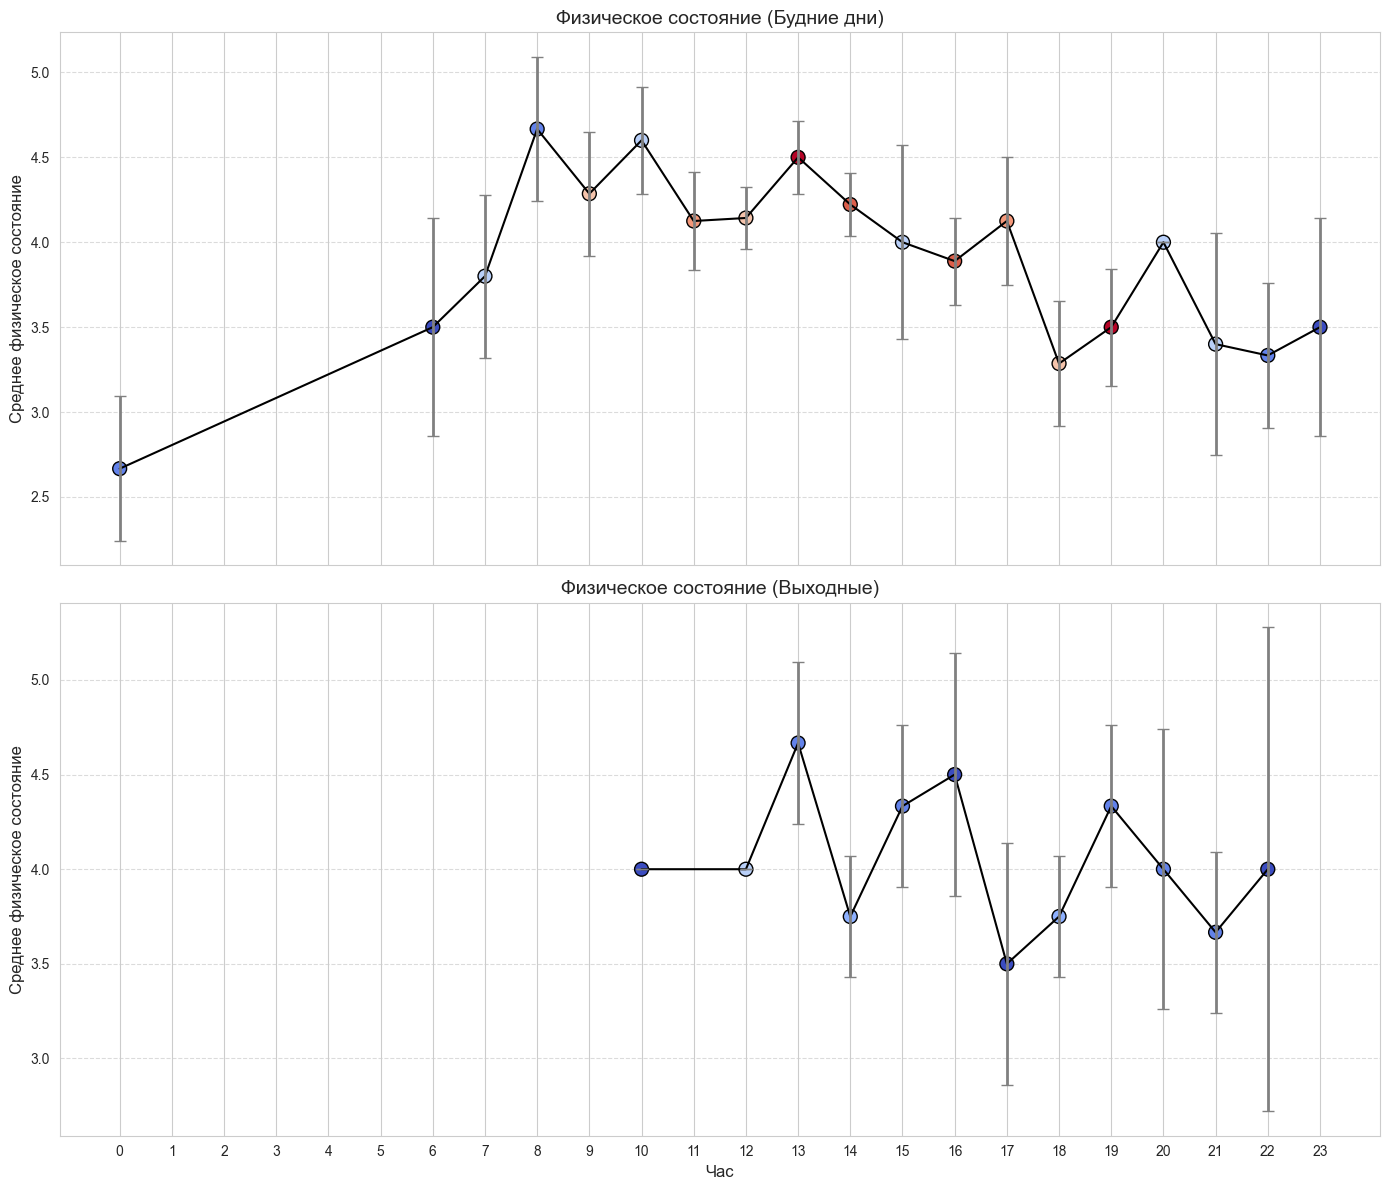

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Загрузка данных
file_path = "/Users/lmao/PycharmProjects/MoodTrackerBot/logs.csv"
logs = pd.read_csv(file_path)

# Преобразование временной метки в datetime
logs['timestamp'] = pd.to_datetime(logs['timestamp'])

# Фильтрация данных для физического состояния
physical_state_map = {
    "Отличное": 5,
    "Хорошее": 4,
    "Нормальное": 3,
    "Плохое": 2,
    "Очень плохое": 1,
}

df_physical = logs[logs['event_type'] == 'answer_physical'].copy()
df_physical['physical_score'] = df_physical['details'].map(physical_state_map)
df_physical['hour'] = df_physical['timestamp'].dt.hour
df_physical['day_type'] = df_physical['timestamp'].dt.weekday.apply(lambda x: 'Будний день' if x < 5 else 'Выходной')

# Группировка данных для анализа
physical_stats = df_physical.groupby(['day_type', 'hour'])['physical_score'].agg(['mean', 'std']).reset_index()

def safe_confidence_interval(mean, std, count, confidence=0.8):
    if count > 1:
        margin = 1.28 * (std / (count ** 0.5))  # z-score для 80% доверительного интервала
        return mean - margin, mean + margin
    else:
        return mean, mean

# Добавление доверительных интервалов
counts = df_physical.groupby(['day_type', 'hour'])['physical_score'].size().reset_index(name='count')
physical_stats = pd.merge(physical_stats, counts, on=['day_type', 'hour'])
physical_stats[['ci_lower', 'ci_upper']] = physical_stats.apply(
    lambda row: pd.Series(safe_confidence_interval(row['mean'], row['std'], row['count'])), axis=1
)

# Нормализация количества ответов для цветовой схемы
norm = mcolors.Normalize(vmin=counts['count'].min(), vmax=counts['count'].max())
colormap = plt.cm.coolwarm

# Визуализация
fig, axes = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

# Будние дни
df_weekday = physical_stats[physical_stats['day_type'] == 'Будний день']
colors_weekday = colormap(norm(df_weekday['count']))
axes[0].plot(
    df_weekday['hour'], df_weekday['mean'], color='black', linestyle='-', label='Будние дни'
)
scatter_weekday = axes[0].scatter(
    df_weekday['hour'], df_weekday['mean'],
    color=colors_weekday, s=100, edgecolor='black'
)
axes[0].errorbar(
    df_weekday['hour'], df_weekday['mean'],
    yerr=[df_weekday['mean'] - df_weekday['ci_lower'], df_weekday['ci_upper'] - df_weekday['mean']],
    fmt='none', ecolor='gray', elinewidth=2, capsize=4
)
axes[0].set_title('Физическое состояние (Будние дни)', fontsize=14)
axes[0].set_ylabel('Среднее физическое состояние', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].set_xticks(range(0, 24))

# Выходные
df_weekend = physical_stats[physical_stats['day_type'] == 'Выходной']
colors_weekend = colormap(norm(df_weekend['count']))
axes[1].plot(
    df_weekend['hour'], df_weekend['mean'], color='black', linestyle='-', label='Выходные'
)
scatter_weekend = axes[1].scatter(
    df_weekend['hour'], df_weekend['mean'],
    color=colors_weekend, s=100, edgecolor='black'
)
axes[1].errorbar(
    df_weekend['hour'], df_weekend['mean'],
    yerr=[df_weekend['mean'] - df_weekend['ci_lower'], df_weekend['ci_upper'] - df_weekend['mean']],
    fmt='none', ecolor='gray', elinewidth=2, capsize=4
)
axes[1].set_title('Физическое состояние (Выходные)', fontsize=14)
axes[1].set_xlabel('Час', fontsize=12)
axes[1].set_ylabel('Среднее физическое состояние', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Добавление цветовой шкалы
sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
sm.set_array([])

plt.tight_layout()
plt.show()

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from scipy.stats import sem
from sklearn.linear_model import LinearRegression

def load_logs(file_path):
    logs = pd.read_csv(file_path)
    logs['timestamp'] = pd.to_datetime(logs['timestamp'])
    return logs

def map_scores(df, state_map):
    df['score'] = df['details'].map(state_map)
    df['hour'] = df['timestamp'].dt.hour
    df['day_type'] = df['timestamp'].dt.weekday.apply(lambda x: 'Будний день' if x < 5 else 'Выходной')
    return df

def calculate_stats(df, group_col='hour', confidence=0.8):
    stats = df.groupby(['day_type', group_col])['score'].agg(['mean', 'std']).reset_index()
    counts = df.groupby(['day_type', group_col])['score'].size().reset_index(name='count')
    stats = pd.merge(stats, counts, on=['day_type', group_col])

    def safe_confidence_interval(mean, std, count):
        if count > 1:
            margin = 1.28 * (std / (count ** 0.5))  # z-score for 80% CI
            return mean - margin, mean + margin
        else:
            return mean, mean

    stats[['ci_lower', 'ci_upper']] = stats.apply(
        lambda row: pd.Series(safe_confidence_interval(row['mean'], row['std'], row['count'])), axis=1
    )
    return stats

def plot_daily_states(stats, title, ylabel, colormap=plt.cm.coolwarm):
    norm = mcolors.Normalize(vmin=stats['count'].min(), vmax=stats['count'].max())

    fig, axes = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

    for i, day_type in enumerate(['Будний день', 'Выходной']):
        df_day = stats[stats['day_type'] == day_type]
        colors = colormap(norm(df_day['count']))

        axes[i].plot(
            df_day['hour'], df_day['mean'], color='black', linestyle='-', label=day_type
        )
        axes[i].scatter(
            df_day['hour'], df_day['mean'],
            color=colors, s=100, edgecolor='black'
        )
        axes[i].errorbar(
            df_day['hour'], df_day['mean'],
            yerr=[df_day['mean'] - df_day['ci_lower'], df_day['ci_upper'] - df_day['mean']],
            fmt='none', ecolor='gray', elinewidth=2, capsize=4
        )
        axes[i].set_title(f'{title} ({day_type})', fontsize=14)
        axes[i].set_ylabel(ylabel, fontsize=12)
        axes[i].grid(axis='y', linestyle='--', alpha=0.7)
        axes[i].set_xticks(range(0, 24))

    axes[1].set_xlabel('Час', fontsize=12)
    plt.tight_layout()
    plt.show()

def plot_trend(df, title, ylabel):
    daily_stats = df.groupby(df['timestamp'].dt.date)['score'].agg(['mean', sem]).reset_index()
    daily_stats.rename(columns={'mean': 'daily_mean', 'sem': 'daily_sem'}, inplace=True)
    daily_stats['ci_lower'] = daily_stats['daily_mean'] - 1.28 * daily_stats['daily_sem']
    daily_stats['ci_upper'] = daily_stats['daily_mean'] + 1.28 * daily_stats['daily_sem']
    
    daily_stats['timestamp'] = pd.to_datetime(daily_stats['timestamp'])
    daily_stats['date'] = pd.to_datetime(daily_stats['timestamp'].dt.date)  # Приведение к datetime
    daily_stats['date_index'] = (daily_stats['date'] - daily_stats['date'].min()).dt.days

    X = daily_stats['date_index'].values.reshape(-1, 1)
    regressor = LinearRegression()
    regressor.fit(X, daily_stats['daily_mean'])
    daily_stats['trend'] = regressor.predict(X)

    plt.figure(figsize=(14, 8))
    plt.plot(daily_stats['date'], daily_stats['daily_mean'], marker='o', color='blue', label='Среднее значение')
    plt.fill_between(
        daily_stats['date'], daily_stats['ci_lower'], daily_stats['ci_upper'], color='lightblue', alpha=0.4, label='Доверительный интервал'
    )
    plt.plot(daily_stats['date'], daily_stats['trend'], color='red', linestyle='--', label='Тренд')
    plt.title(title, fontsize=16)
    plt.xlabel('Дата', fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    plt.show()

def plot_frequency_analysis(df, title, ylabel):
    daily_mean = df.groupby(df['timestamp'].dt.date)['score'].mean()
    fft_result = np.fft.fft(daily_mean)
    frequencies = np.fft.fftfreq(len(daily_mean))

    periods = 1 / frequencies[1:len(frequencies)//2]
    amplitudes = np.abs(fft_result[1:len(frequencies)//2])

    plt.figure(figsize=(14, 8))
    plt.plot(periods, amplitudes, color='green')
    plt.title(title, fontsize=16)
    plt.xlabel('Период (дни)', fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xscale('log')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Загрузка и анализ данных
file_path = "/Users/lmao/PycharmProjects/MoodTrackerBot/logs.csv"
logs = load_logs(file_path)
logs['timestamp'] = pd.to_datetime(logs['timestamp'])

# Эмоциональное состояние
mood_map = {
    "Прекрасное": 10,
    "Очень хорошее": 9,
    "Хорошее": 8,
    "Удовлетворительное": 7,
    "Нормальное": 6,
    "Среднее": 5,
    "Плохое": 4,
    "Очень плохое": 3,
    "Ужасное": 2,
    "Критически плохое": 1,
}

df_emotion = map_scores(logs[logs['event_type'] == 'answer_emotional'].copy(), mood_map)
emotion_stats = calculate_stats(df_emotion)
plot_daily_states(emotion_stats, 'Эмоциональное состояние', 'Среднее состояние')
plot_trend(df_emotion, 'Тренд эмоционального состояния', 'Эмоциональное состояние')
plot_frequency_analysis(df_emotion, 'Частотный анализ эмоционального состояния', 'Амплитуда')

# Физическое состояние
physical_state_map = {
    "Отличное": 5,
    "Хорошее": 4,
    "Нормальное": 3,
    "Плохое": 2,
    "Очень плохое": 1,
}

df_physical = map_scores(logs[logs['event_type'] == 'answer_physical'].copy(), physical_state_map)
physical_stats = calculate_stats(df_physical)
plot_daily_states(physical_stats, 'Физическое состояние', 'Среднее физическое состояние')
plot_trend(df_physical, 'Тренд физического состояния', 'Физическое состояние')
plot_frequency_analysis(df_physical, 'Частотный анализ физического состояния', 'Амплитуда')

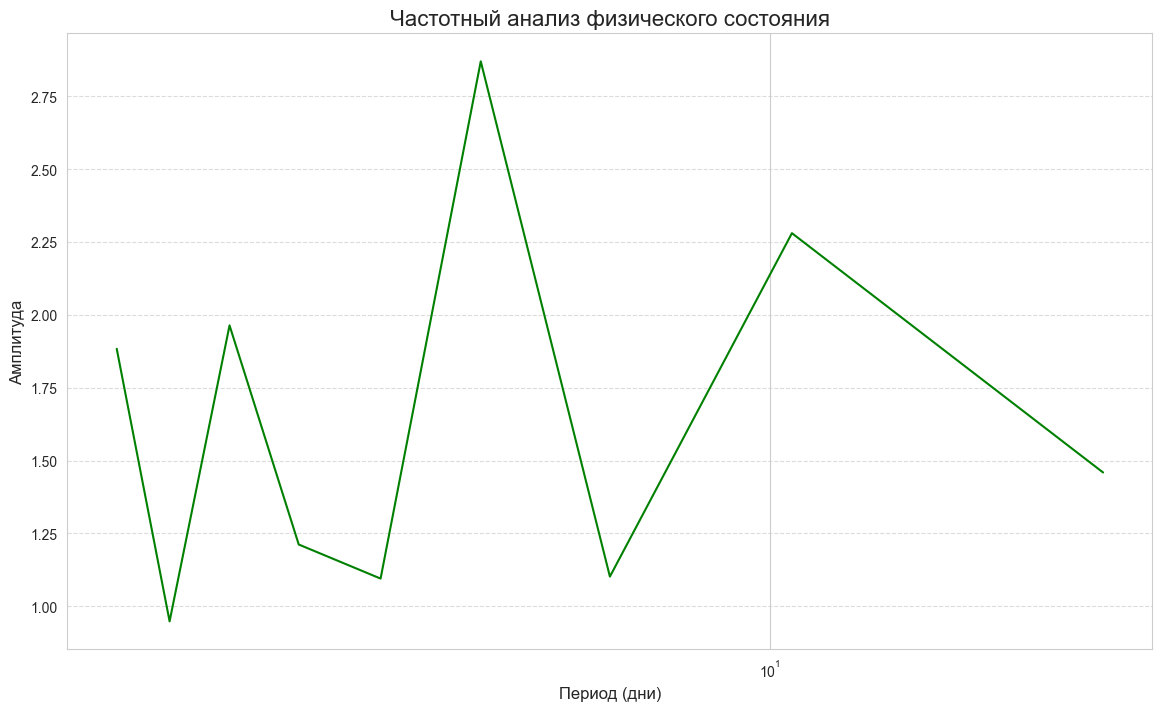

In [53]:
df_physical = map_scores(logs[logs['event_type'] == 'answer_physical'].copy(), physical_state_map)
physical_stats = calculate_stats(df_physical)
# plot_daily_states(physical_stats, 'Физическое состояние', 'Среднее физическое состояние')
# plot_trend(df_physical, 'Тренд физического состояния', 'Физическое состояние')
plot_frequency_analysis(df_physical, 'Частотный анализ физического состояния', 'Амплитуда')